In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the data
# Assuming the dataset file 'diabetes.csv' is in the same directory as the Jupyter Notebook
df_diabetes = pd.read_csv('diabetes.csv')

# Step 3: Separate features (X) and target variable (y)
X_diabetes = df_diabetes.drop('Outcome', axis=1)  # Features (all columns except 'Outcome')
y_diabetes = df_diabetes['Outcome']  # Target variable ('Outcome')

# Step 4: Split the data into training and testing sets
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Step 5: Feature Scaling (optional but recommended for some algorithms)
scaler_diabetes = StandardScaler()
X_train_scaled_diabetes = scaler_diabetes.fit_transform(X_train_diabetes)
X_test_scaled_diabetes = scaler_diabetes.transform(X_test_diabetes)

# Step 6: Model Selection and Training
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled_diabetes, y_train_diabetes)

# Step 7: Model Evaluation
y_pred_diabetes = logistic_regression.predict(X_test_scaled_diabetes)

# Step 8: Calculate accuracy and other metrics
accuracy_diabetes = accuracy_score(y_test_diabetes, y_pred_diabetes)
classification_rep_diabetes = classification_report(y_test_diabetes, y_pred_diabetes)
conf_matrix_diabetes = confusion_matrix(y_test_diabetes, y_pred_diabetes)

# Step 9: Print the results
print(f'Logistic Regression Classifier Accuracy for Diabetes Prediction: {accuracy_diabetes:.2f}')
print('Classification Report:')
print(classification_rep_diabetes)
print('Confusion Matrix:')
print(conf_matrix_diabetes)


Logistic Regression Classifier Accuracy for Diabetes Prediction: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
[[79 20]
 [18 37]]


In [2]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression (you can adjust this based on the classifier)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create Logistic Regression classifier
logistic_regression = LogisticRegression()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train_scaled_diabetes, y_train_diabetes)

# Get the best hyperparameters and retrain the model
best_params = grid_search.best_params_
best_logistic_regression = LogisticRegression(**best_params)
best_logistic_regression.fit(X_train_scaled_diabetes, y_train_diabetes)

# Evaluate the model with best hyperparameters
y_pred_diabetes = best_logistic_regression.predict(X_test_scaled_diabetes)

# Calculate accuracy and other metrics
accuracy_diabetes = accuracy_score(y_test_diabetes, y_pred_diabetes)
classification_rep_diabetes = classification_report(y_test_diabetes, y_pred_diabetes)
conf_matrix_diabetes = confusion_matrix(y_test_diabetes, y_pred_diabetes)

# Print the results
print(f'Best Logistic Regression Classifier Accuracy for Diabetes Prediction: {accuracy_diabetes:.2f}')
print('Classification Report:')
print(classification_rep_diabetes)
print('Confusion Matrix:')
print(conf_matrix_diabetes)


Best Logistic Regression Classifier Accuracy for Diabetes Prediction: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix:
[[83 16]
 [20 35]]


In [3]:
# After training the best logistic regression model (best_logistic_regression)
# Get feature importance (coefficients for each feature)
feature_importance = best_logistic_regression.coef_[0]

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_diabetes.columns,
    'Importance': feature_importance
})

# Sort features by importance (absolute value) in descending order
feature_importance_df = feature_importance_df.reindex(
    feature_importance_df['Importance'].abs().sort_values(ascending=False).index
)

# Display the sorted feature importance
print(feature_importance_df)


                    Feature  Importance
1                   Glucose    0.886843
5                       BMI    0.589324
7                       Age    0.331728
0               Pregnancies    0.139825
6  DiabetesPedigreeFunction    0.117792
2             BloodPressure   -0.065602
4                   Insulin   -0.033237
3             SkinThickness    0.000000


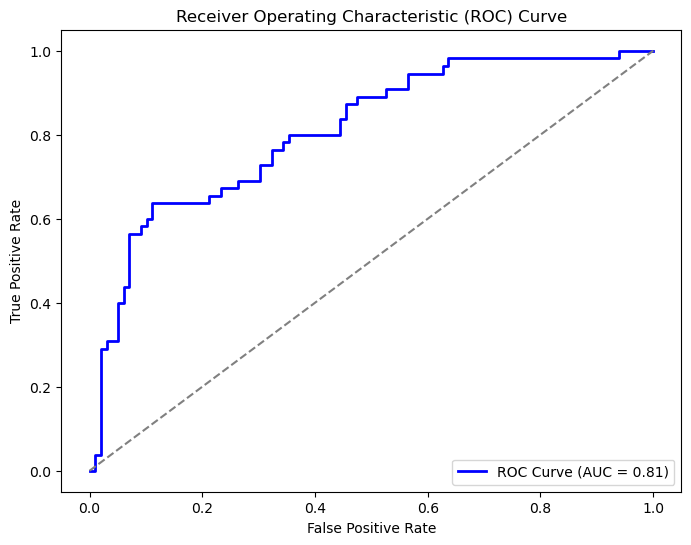

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probability scores for the positive class (1)
y_prob_diabetes = best_logistic_regression.predict_proba(X_test_scaled_diabetes)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_diabetes, y_prob_diabetes)
roc_auc = roc_auc_score(y_test_diabetes, y_prob_diabetes)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


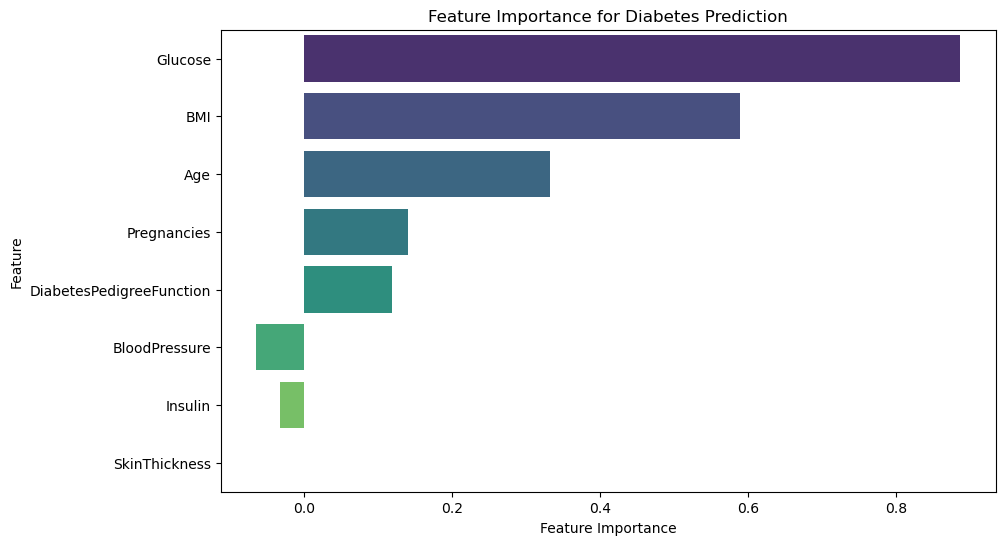

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# After training the best logistic regression model (best_logistic_regression)
# Get feature importance (coefficients for each feature)
feature_importance = best_logistic_regression.coef_[0]

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_diabetes.columns,
    'Importance': feature_importance
})

# Sort features by importance (absolute value) in descending order
feature_importance_df = feature_importance_df.reindex(
    feature_importance_df['Importance'].abs().sort_values(ascending=False).index
)

# Plot feature importance using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Diabetes Prediction')
plt.show()


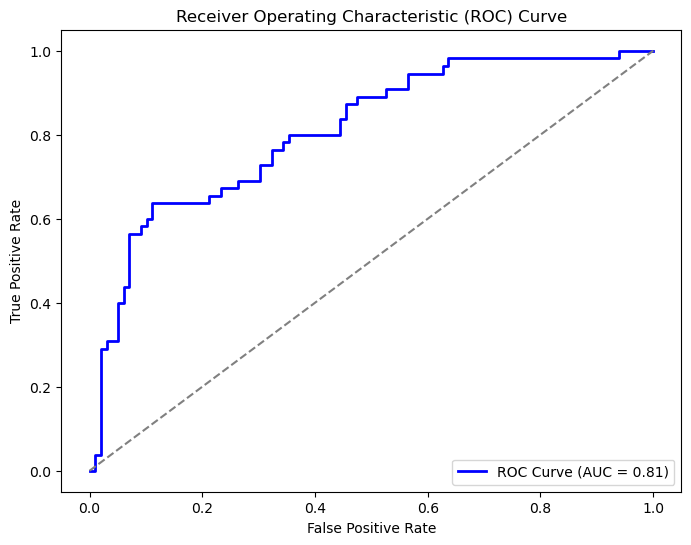

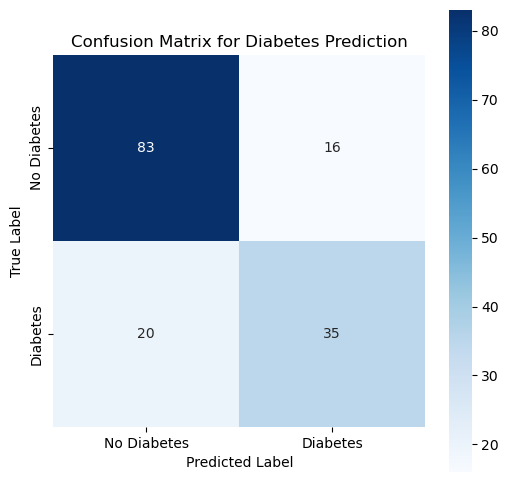

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

# Calculate the probability scores for the positive class (1)
y_prob_diabetes = best_logistic_regression.predict_proba(X_test_scaled_diabetes)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_diabetes, y_prob_diabetes)
roc_auc = roc_auc_score(y_test_diabetes, y_prob_diabetes)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_diabetes, y_pred_diabetes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Diabetes Prediction')
plt.show()
